# K-nearest neighbor classification

By Jaime Lopez  
Apr. 20, 2019

In this notebook an implementation of the K-nearest neighbor classification method is made. It uses as an example the Iris dataset.

Nearest neighbor methods use those observations in the training sample closest in the input space to $x$ to predict $\hat{y}$.

$$\hat{y} = \frac{1}{k} \sum_{x_i \in N_k{x}} y_i$$

$N_k{k}$ is the neighborhood of $x$ defined by the $k$ closest points $x_i$ in the training sample.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data exploration

In [6]:
data = pd.read_csv('datasets/iris/iris.csv')

In [7]:
data.columns

Index(['sl', 'sw', 'pl', 'pw', 'class'], dtype='object')

Column names correspond to:

- sl: sepal lenght
- sw: sepal width
- pl: petal lenght
- pw: petal width

In [8]:
data.shape

(150, 5)

In [9]:
data.head()

,sl,sw,pl,pw,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [150]:
color = data['class'].apply(lambda x: 'B' if x == 'Iris-setosa' else 'R' if x == 'Iris-versicolor' else 'G')

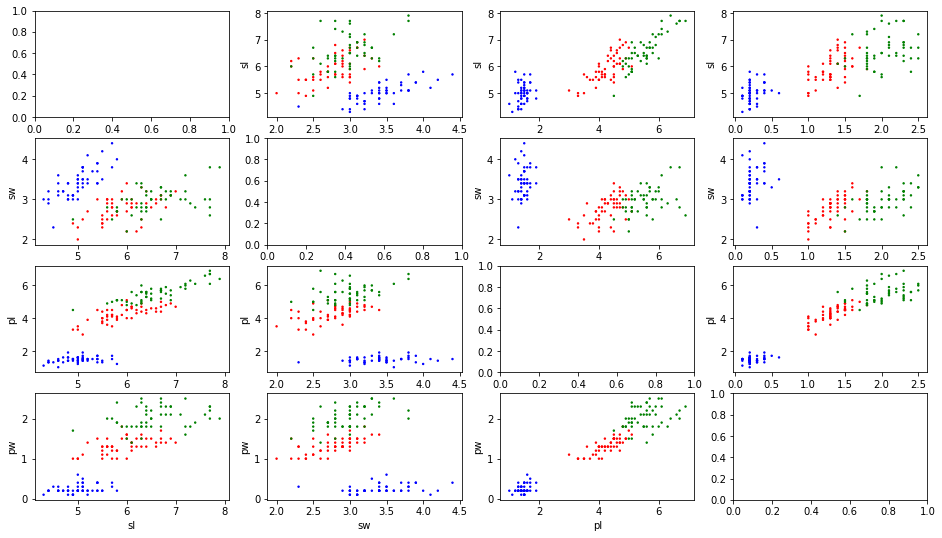

In [151]:
fig, axes = plt.subplots(nrows=4, ncols=4)
col_values = ['sl', 'sw', 'pl', 'pw']
for i in range(4):
    for j in range(4):
        if i != j:
            data.plot(kind='scatter', x=col_values[i], y=col_values[j],color=color, ax=axes[j, i], s=2, figsize=(16,9))

## KNN implementation

An own implementation will be tested. The dataset is splitted in a train sample and a test sample.

In [30]:
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)
print('Train sample: %d elements' % len(train))
print('Test sample : %d elements' % len(test))

Train sample: 105 elements
Test sample : 45 elements


In [55]:
def euclidean_distance(x1, x2):
    diff = x1 - x2
    return np.sqrt((diff * diff).sum())

In [101]:
def predict(x1, k=5):
    res = []
    for i in range(len(train)):
        x2 = train.iloc[i][col_values]
        d = euclidean_distance(x1, x2)
        res.append({'idx': i, 'dist': d})
    df = pd.DataFrame(res).sort_values('dist')
    keys = train['class'].unique()
    counter = {}
    for key in keys:
        counter[key] = 0
    for i in range(len(df)):
        idx = int(df.iloc[i]['idx'])
        c = data.iloc[idx]['class']
        counter[c] += 1
        if counter[c] == k:
            return c 

In [121]:
def effectiveness(k):
    y_hat = []
    hits = []
    for i in range(len(test)):
        x = test.iloc[i][col_values]
        y = test.iloc[i]['class']
        p = predict(x, k)
        y_hat.append(p)
        if y == p:
            hits.append(1)
        else:
            hits.append(0)
    return np.array(hits).sum() / len(hits)

In [141]:
results = [effectiveness(k) for k in range(5, 25)]

Text(0, 0.5, 'effectiveness')

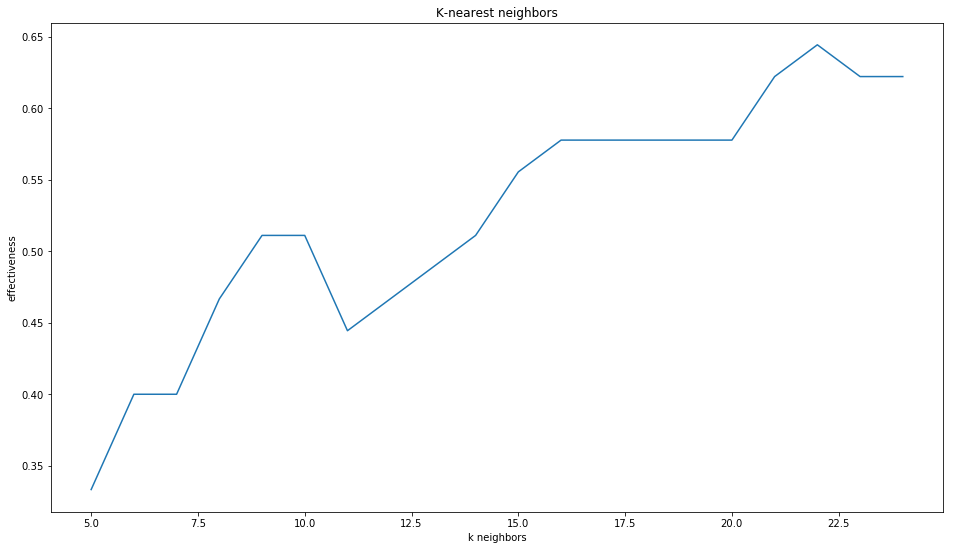

In [155]:
plt.figure(figsize=(16,9))
plt.plot(range(5, 25), results)
plt.title('K-nearest neighbors')
plt.xlabel('k neighbors')
plt.ylabel('effectiveness')

For this implementation effectiveness is too low. Like it can be viewed, it does not go over 0.65 for k > 20.

## Using sklearn

In this secction, the KNN method implemented in the SKLear library is used. It ranks effectiveness over 0.9.

In [163]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [179]:
def sk_effectiveness(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train[col_values], train['class'])
    y_hat = knn.predict(test[col_values])
    hits = []
    for i in range(len(test)):
        if y_hat[i] == test.iloc[i]['class']:
            hits.append(1)
        else:
            hits.append(0)
    return np.array(hits).sum() / len(hits)

In [180]:
sk_results = [sk_effectiveness(k) for k in range(5, 25)]

Text(0, 0.5, 'effectiveness')

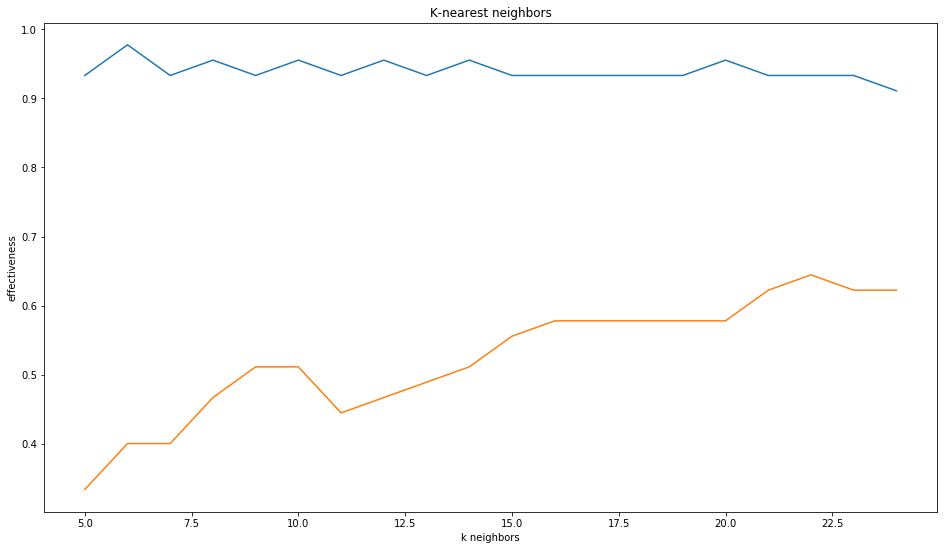

In [185]:
plt.figure(figsize=(16,9))
plt.plot(range(5, 25), sk_results, label='sklear')
plt.plot(range(5, 25), results, label='own')
plt.title('K-nearest neighbors')
plt.xlabel('k neighbors')
plt.ylabel('effectiveness')